# SECTION 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')        # This applies a Matplotlib style that looks similar to seaborn’s darkgrid theme.
                                              #It changes background, gridlines, colors, and general aesthetics for all plots.
sns.set_palette("husl")                       #This sets a seaborn color palette (HUSL = Hue, Saturation, Lightness).
                                              #It gives your plots bright, evenly spaced colors.
                                              #It affects seaborn plots and also some matplotlib plots if seaborn has been imported.

# SECTION 2: LOAD DATA

In [3]:
df = pd.read_csv('/content/product_info.csv')

In [4]:
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [5]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
df.tail()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN
8493,P505461,Candy Glaze Lip Gloss Stick Duo with Hyaluroni...,1070,Yves Saint Laurent,193,NaN,NaN,.11 oz / 3.2 mL,Color,NaN,...,1,0,1,"['Hyaluronic Acid', 'High Shine Finish', 'Plum...",Makeup,Lip,Lip Gloss,0,NaN,NaN


In [7]:
df.shape

(8494, 27)

In [8]:
df.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['rating'].value_counts()

,count
rating,
5.0000,256
4.0000,174
4.5000,82
4.3333,68
3.0000,66
...,...
3.5158,1
4.2677,1
4.7873,1


In [11]:
df['reviews'].value_counts()

,count
reviews,
2.0,144
4.0,134
1.0,124
3.0,124
6.0,124
...,...
864.0,1
911.0,1
1319.0,1


#EDA Visualization

In [12]:
# 3.2 Check for missing values
print("\n2. MISSING VALUES ANALYSIS")
print("-"*40)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})

print(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))




2. MISSING VALUES ANALYSIS
----------------------------------------
                    Missing Values  Percentage
sale_price_usd                8224   96.821286
value_price_usd               8043   94.690370
variation_desc                7244   85.283730
child_max_price               5740   67.577113
child_min_price               5740   67.577113
highlights                    2207   25.983047
size                          1631   19.201789
variation_value               1598   18.813280
variation_type                1444   17.000235
tertiary_category              990   11.655286
ingredients                    945   11.125500
reviews                        278    3.272899
rating                         278    3.272899
secondary_category               8    0.094184


In [13]:
# 3.3 Check unique values in categorical columns
print("\n3. CATEGORICAL COLUMNS ANALYSIS")
print("-"*40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Sample values: {df[col].dropna().unique()[:5]}")




3. CATEGORICAL COLUMNS ANALYSIS
----------------------------------------

product_id:
  Unique values: 8494
  Sample values: ['P473671' 'P473668' 'P473662' 'P473660' 'P473658']

product_name:
  Unique values: 8415
  Sample values: ['Fragrance Discovery Set' 'La Habana Eau de Parfum'
 'Rainbow Bar Eau de Parfum' 'Kasbah Eau de Parfum'
 'Purple Haze Eau de Parfum']

brand_name:
  Unique values: 304
  Sample values: ['19-69' '54 Thrones' 'ABBOTT' 'Acqua di Parma' 'adwoa beauty']

size:
  Unique values: 2055
  Sample values: ['3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL' '6 oz / 180 mL' '1 oz / 30 mL'
 '1.7 oz / 50 mL']

variation_type:
  Unique values: 7
  Sample values: ['Size + Concentration + Formulation' 'Scent' 'Size' 'Color'
 'Size + Concentration']

variation_value:
  Unique values: 2729
  Sample values: ['3.4 oz/ 100 mL' '0.25 oz/ 7.5 mL Eau de Parfum Spray' '0.25 oz/ 7.5 mL'
 '3.4 oz/ 100 mL Eau de Parfum Spray' 'Ugandan Vanilla + Ethiopian Honey']

variation_desc:
  Unique values: 935
  S


4. NUMERICAL COLUMNS DISTRIBUTION
----------------------------------------

Column: loves_count
count    8.494000e+03
mean     2.917957e+04
std      6.609212e+04
min      0.000000e+00
25%      3.758000e+03
50%      9.880000e+03
75%      2.684125e+04
max      1.401068e+06
Name: loves_count, dtype: float64


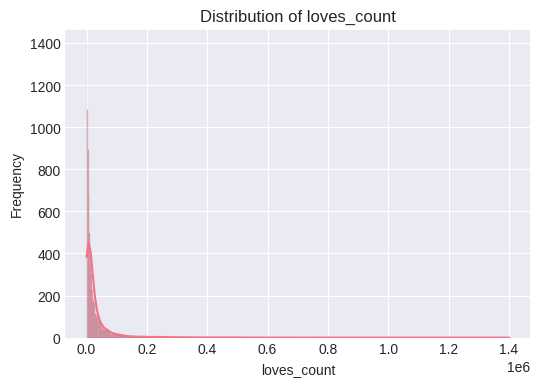


Column: rating
count    8216.000000
mean        4.194513
std         0.516694
min         1.000000
25%         3.981725
50%         4.289350
75%         4.530525
max         5.000000
Name: rating, dtype: float64


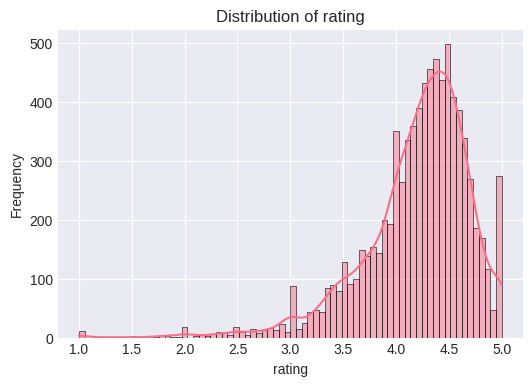


Column: reviews
count     8216.000000
mean       448.545521
std       1101.982529
min          1.000000
25%         26.000000
50%        122.000000
75%        418.000000
max      21281.000000
Name: reviews, dtype: float64


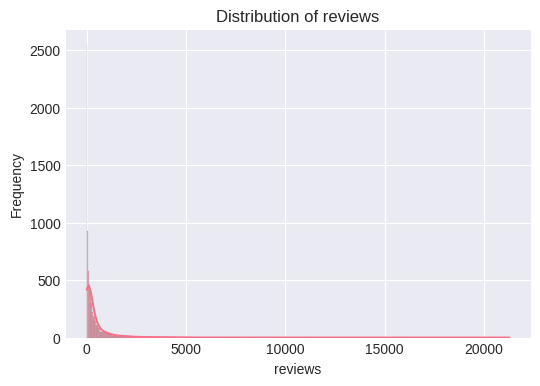


Column: price_usd
count    8494.000000
mean       51.655595
std        53.669234
min         3.000000
25%        25.000000
50%        35.000000
75%        58.000000
max      1900.000000
Name: price_usd, dtype: float64


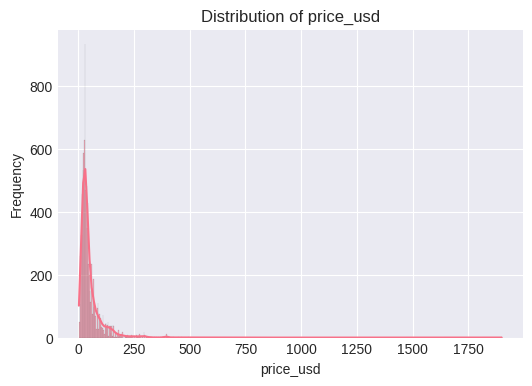


Column: child_count
count    8494.000000
mean        1.631622
std         5.379470
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       105.000000
Name: child_count, dtype: float64


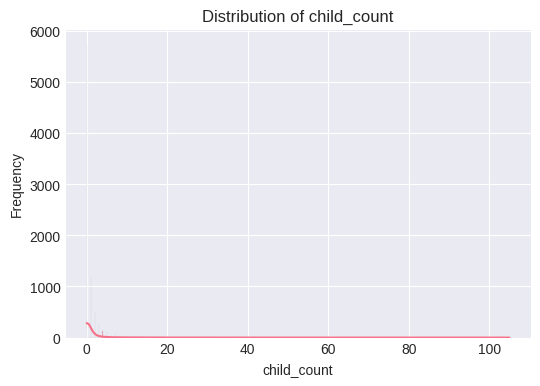


Column: child_max_price
count    2754.000000
mean       53.792023
std        58.765894
min         3.000000
25%        22.000000
50%        32.000000
75%        59.000000
max       570.000000
Name: child_max_price, dtype: float64


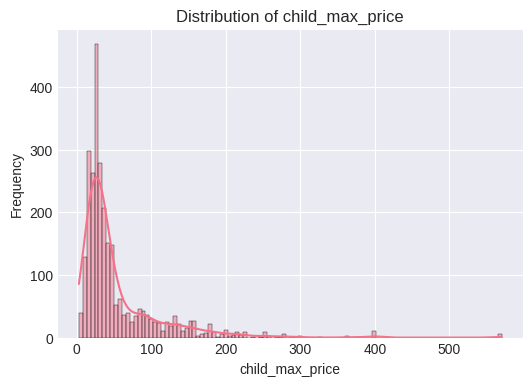


Column: child_min_price
count    2754.000000
mean       39.665802
std        38.685720
min         3.000000
25%        19.000000
50%        28.000000
75%        42.000000
max       400.000000
Name: child_min_price, dtype: float64


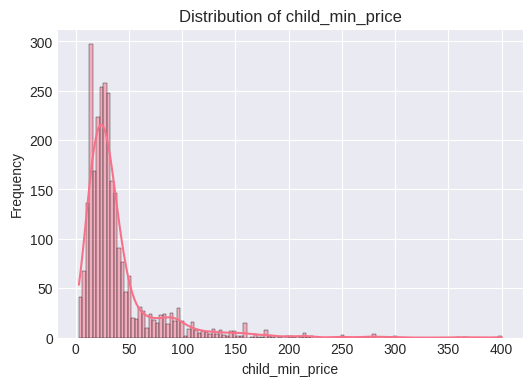

In [14]:
# 3.4 Numerical columns distribution
print("\n4. NUMERICAL COLUMNS DISTRIBUTION")
print("-"*40)
numerical_cols = ['loves_count', 'rating', 'reviews', 'price_usd', 'child_count',
                  'child_max_price', 'child_min_price']
numerical_cols = [col for col in numerical_cols if col in df.columns]
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(df[col].describe())

    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

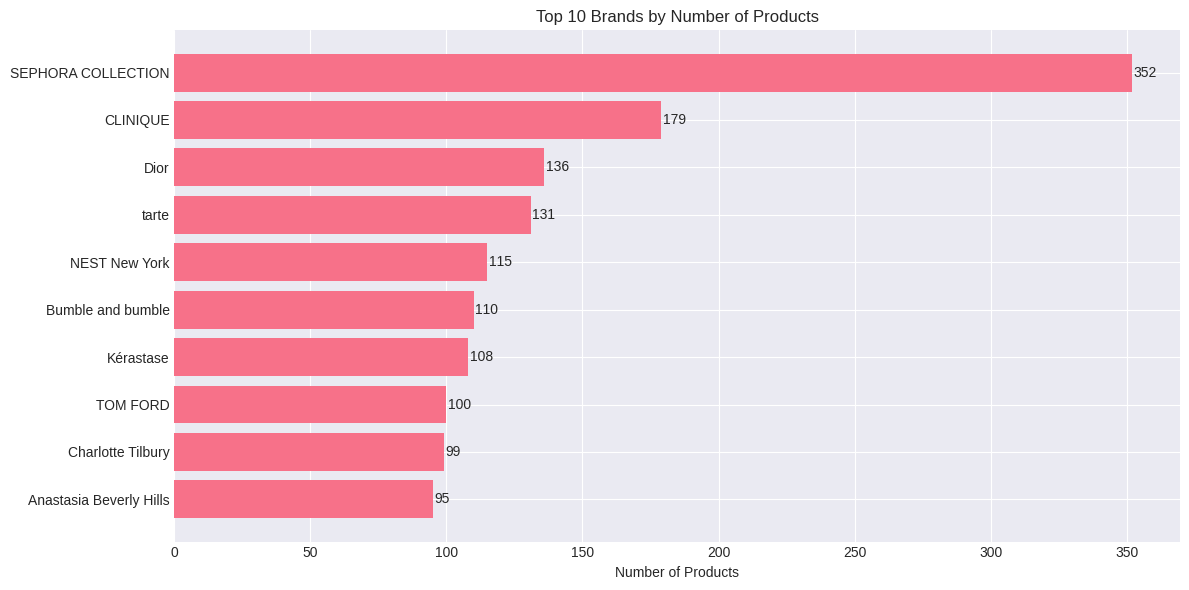

In [15]:
6# Visualize top brands by product count
plt.figure(figsize=(12, 6))
top_brands_data = df['brand_name'].value_counts().head(10).reset_index()
top_brands_data.columns = ['brand_name', 'product_count']
bars = plt.barh(top_brands_data['brand_name'], top_brands_data['product_count'])
plt.xlabel('Number of Products')
plt.title('Top 10 Brands by Number of Products')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.savefig('top_brands.png', dpi=300, bbox_inches='tight')
plt.show()


7. RATING ANALYSIS
----------------------------------------
count    8216.000000
mean        4.194513
std         0.516694
min         1.000000
25%         3.981725
50%         4.289350
75%         4.530525
max         5.000000
Name: rating, dtype: float64


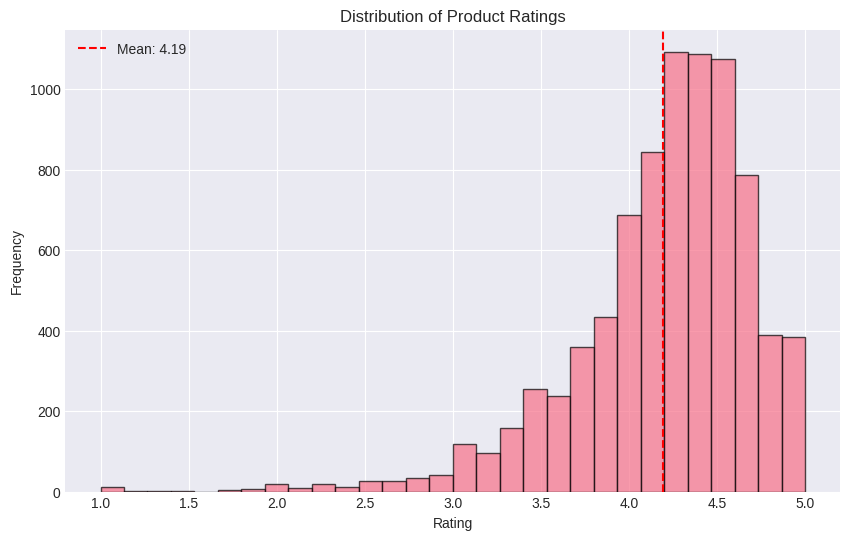

In [16]:
# 3.7 Rating analysis
print("\n7. RATING ANALYSIS")
print("-"*40)
rating_stats = df['rating'].describe()
print(rating_stats)

plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.axvline(df['rating'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["rating"].mean():.2f}')
plt.legend()
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# SECTION 4: DATA PREPROCESSING FOR ANN

In [17]:
# 4.1 Select features and target
# For this example, let's predict product rating based on other features
# We'll use loves_count, reviews, price_usd as features

# Create a clean dataset for modeling
model_df = df[['loves_count', 'rating', 'reviews', 'price_usd']].dropna()

In [18]:
# Handle infinite values
model_df = model_df.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Model dataset shape: {model_df.shape}")

# 4.2 Define features and target
X = model_df[['loves_count', 'reviews', 'price_usd']].values
y = model_df['rating'].values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# 4.3 Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 4.4 Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed")
print(f"X_train mean after scaling: {X_train_scaled.mean():.6f}")
print(f"X_train std after scaling: {X_train_scaled.std():.6f}")


Model dataset shape: (8216, 4)
X shape: (8216, 3)
y shape: (8216,)

Training set size: 6572
Test set size: 1644

Feature scaling completed
X_train mean after scaling: 0.000000
X_train std after scaling: 1.000000


# SECTION 5: BUILD AND TRAIN ANN MODEL

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model

In [20]:
print("\n" + "="*80)
print("ARTIFICIAL NEURAL NETWORK (ANN) MODEL")
print("="*80)

model = Sequential()
model.add(Dense(5 , activation = 'relu' , input_dim = X_train_scaled.shape[1]))
model.add(Dense(10 , activation = 'relu'))
model.add(Dense(1, activation='linear')) # Changed to linear activation for regression
model.summary()

# 5.2 Compile the model
# Changed loss function and metrics for regression
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])


ARTIFICIAL NEURAL NETWORK (ANN) MODEL


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

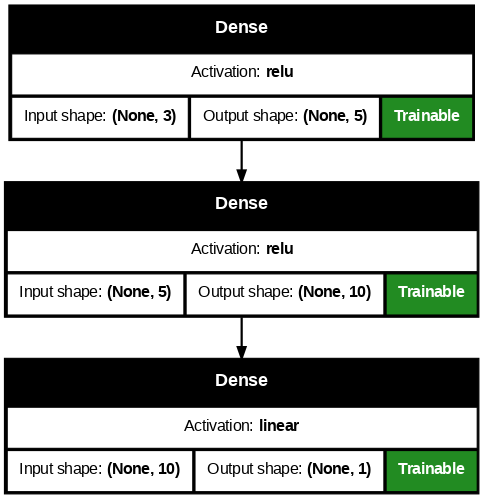

In [21]:
plot_model(
    model ,
    show_shapes = True ,
    dpi = 80,
    show_layer_activations = True,
    show_trainable = True
)

In [22]:
history= model.fit(X_train_scaled , y_train , epochs = 50 ,validation_split = 0.2)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 16.1304 - mae: 3.9678 - val_loss: 8.0974 - val_mae: 2.7453
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7656 - mae: 2.1863 - val_loss: 1.7494 - val_mae: 1.0341
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5106 - mae: 0.9034 - val_loss: 1.0604 - val_mae: 0.7858
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0971 - mae: 0.7556 - val_loss: 0.8092 - val_mae: 0.6884
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8585 - mae: 0.6775 - val_loss: 0.6549 - val_mae: 0.6142
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6562 - mae: 0.6082 - val_loss: 0.5472 - val_mae: 0.5675
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5416 - mae: 0.5540 - val_loss: 0.4458 - val_mae: 0.5049
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4540 - mae: 0.5068 - val_loss: 0.3652 - val_mae: 0.4551
Epoch 9/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [23]:
y_pred = model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_pred

array([[3731.569  ],
       [ 456.07294],
       [1161.6898 ],
       ...,
       [4982.2764 ],
       [ 152.75621],
       [1564.2902 ]], dtype=float32)

# SECTION 6: MODEL EVALUATION


MODEL EVALUATION
Test Loss (MSE): 0.2465
Test MAE: 0.3719
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Performance Metrics:
MSE: 0.2465
RMSE: 0.4965
MAE: 0.3719
R² Score: 0.0502


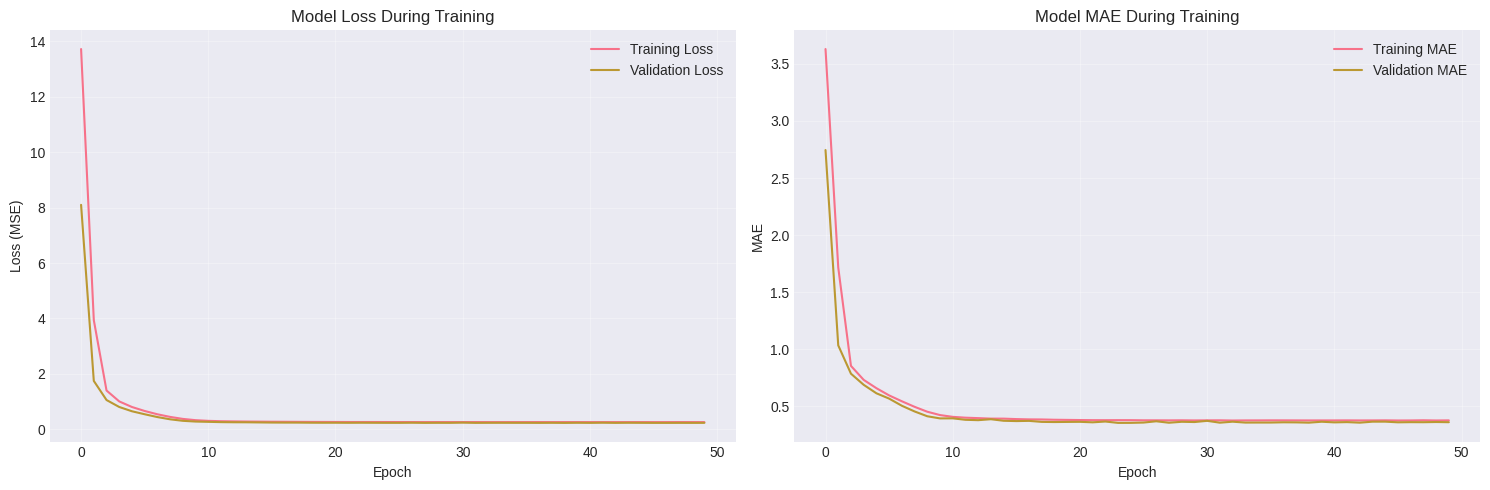

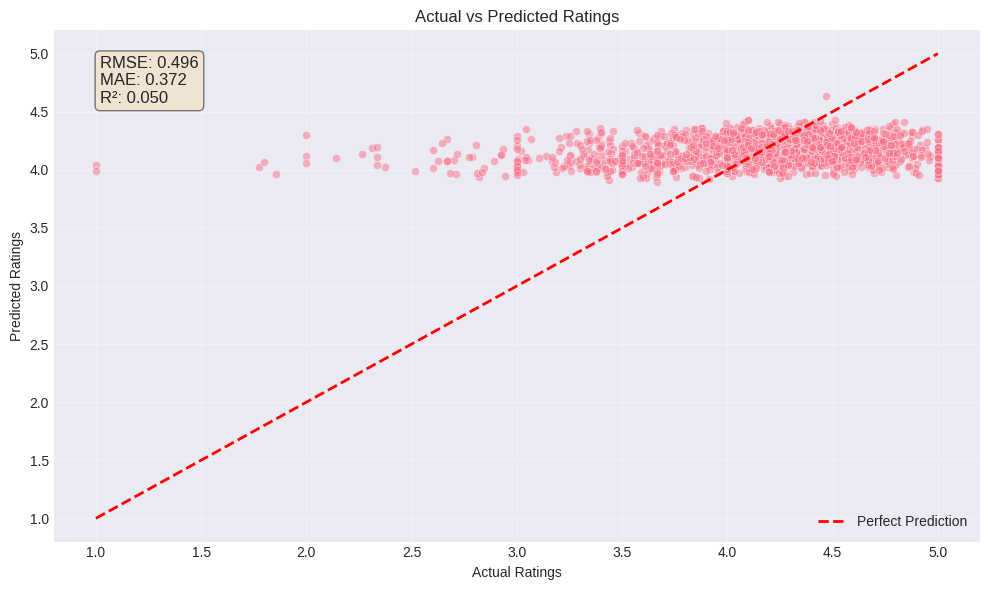

In [26]:
print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)

# 6.1 Evaluate on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# 6.2 Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# 6.3 Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 6.4 Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Model Loss During Training')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('Model MAE During Training')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.5 Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.grid(True, alpha=0.3)

# Add metrics to plot
text_str = f'RMSE: {rmse:.3f}\nMAE: {mae:.3f}\nR²: {r2:.3f}'
plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=300, bbox_inches='tight')



In [27]:
from sklearn.metrics import accuracy_score

In [28]:
# 6.2 Make predictions
y_pred = model.predict(X_test_scaled)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # number of land classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
y_pred

array([[4.276263 ],
       [4.0511565],
       [4.3529897],
       ...,
       [4.151139 ],
       [4.311387 ],
       [4.1093946]], dtype=float32)

In [32]:
  from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9473684210526315


# Deploy the Prediction

In [37]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assume model & scaler are already trained
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler (if used)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [45]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 18.1 MB/s eta 0:00:00


In [48]:
import streamlit as st
import numpy as np
import pickle

# Load model
with open("rf_model.pkl", "rb") as f:
    model = pickle.load(f)

# Load scaler (if used)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

st.title("⭐ Product Rating Prediction (Random Forest)")

st.write("Enter product details to predict rating")

# Input fields (change according to your dataset)
price = st.number_input("Product Price", min_value=0.0)
discount = st.number_input("Discount (%)", min_value=0.0)
reviews = st.number_input("Number of Reviews", min_value=0)

if st.button("Predict Rating"):
    input_data = np.array([[price, discount, reviews]])
    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)

    st.success(f"⭐ Predicted Rating: {prediction[0]}")



2025-12-28 18:16:51.502 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 18:16:52.193 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-28 18:16:52.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 18:16:52.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 18:16:52.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 18:16:52.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 18:16:52.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 18:16:52.212 Thread 'MainThread': mi